In [1]:
import pandas as pd

In [2]:
a=pd.DataFrame({'A': [1, 2, 3]})

In [3]:
a

,A
0,1
1,2
2,3


In [4]:
dataset = pd.read_csv("2008.csv", delimiter=",",index_col=0)

In [5]:
dataset.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,,,,,,,,,,,,,,,,,,,,,
2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
df=dataset[(dataset["Month"]>11) & ((dataset["DepTime"]>0)&(dataset["DepTime"]<700)) & (dataset["DayOfWeek"]>5) & (dataset["CarrierDelay"]>0)]

In [7]:
df[["FlightNum","TailNum","UniqueCarrier","CarrierDelay"]].head()

,FlightNum,TailNum,UniqueCarrier,CarrierDelay
Year,,,,
2008,1491,N315SW,WN,19.0
2008,1706,N394SW,WN,13.0
2008,2892,N497WN,WN,9.0
2008,1320,N425LV,WN,9.0
2008,2200,N603SW,WN,18.0


In [8]:
df.groupby(["UniqueCarrier"]).agg({"FlightNum": "count", "CarrierDelay": "mean"})

,FlightNum,CarrierDelay
UniqueCarrier,,
9E,24,59.208333
AA,54,71.888889
AS,19,121.421053
B6,77,60.246753
CO,42,71.309524
DL,68,38.176471
EV,49,32.346939
F9,11,26.090909
FL,14,68.714286


In [52]:
import matplotlib.pyplot as plt


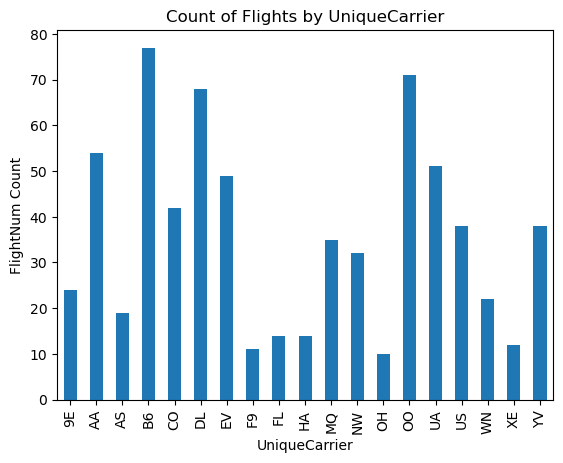

In [21]:
grouped_df = df.groupby(["UniqueCarrier"]).agg({"FlightNum": "count", "CarrierDelay": "mean"})

# Create a bar plot of FlightNum counts for each UniqueCarrier
grouped_df["FlightNum"].plot(kind="bar")

# Add labels and title
plt.xlabel("UniqueCarrier")
plt.ylabel("FlightNum Count")
plt.title("Count of Flights by UniqueCarrier")

# Display the plot
plt.show()

In [26]:
dataset[(

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,,,,,,,,,,,,,,,,,,,,,
2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [27]:
dataset[["DepDelay","ArrDelay"]]

,DepDelay,ArrDelay
Year,,
2008,8.0,-14.0
2008,19.0,2.0
2008,8.0,14.0
2008,-4.0,-6.0
2008,34.0,34.0
...,...,...
2008,3.0,14.0
2008,-1.0,-2.0
2008,-5.0,0.0


In [41]:
suma=lambda row: row["DepDelay"]+ row["ArrDelay"]

dataset["delaytotal"]=dataset.apply(suma,axis=1)

In [ ]:
dataset["delaytotal"]

In [79]:
delay=dataset[(dataset["delaytotal"]>15)&(dataset["Distance"]>2000)&(dataset["AirTime"]>300)]

In [89]:
delay.groupby(["Origin"]).agg({"AirTime":"mean","Distance":"mean","delaytotal":"mean"}).head()

,AirTime,Distance,delaytotal
Origin,,,
ALB,328.313433,2237.000000,79.000000
ANC,348.444260,2892.041597,76.029950
ATL,368.614989,2697.220426,64.218957
BDL,339.006098,2371.182927,73.786585
BOS,354.940643,2564.466667,82.884795


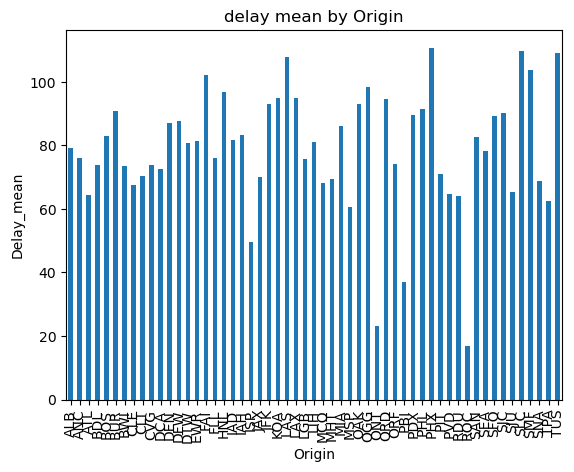

In [88]:
grouped_delay = delay.groupby(["Origin"]).agg({"AirTime":"mean","Distance":"mean","delaytotal":"mean"})

# Create a bar plot of FlightNum counts for each UniqueCarrier
grouped_delay["delaytotal"].plot(kind="bar")

# Add labels and title
plt.xlabel("Origin")
plt.ylabel("Delay_mean")
plt.title("delay mean by Origin")

# Display the plot
plt.show()

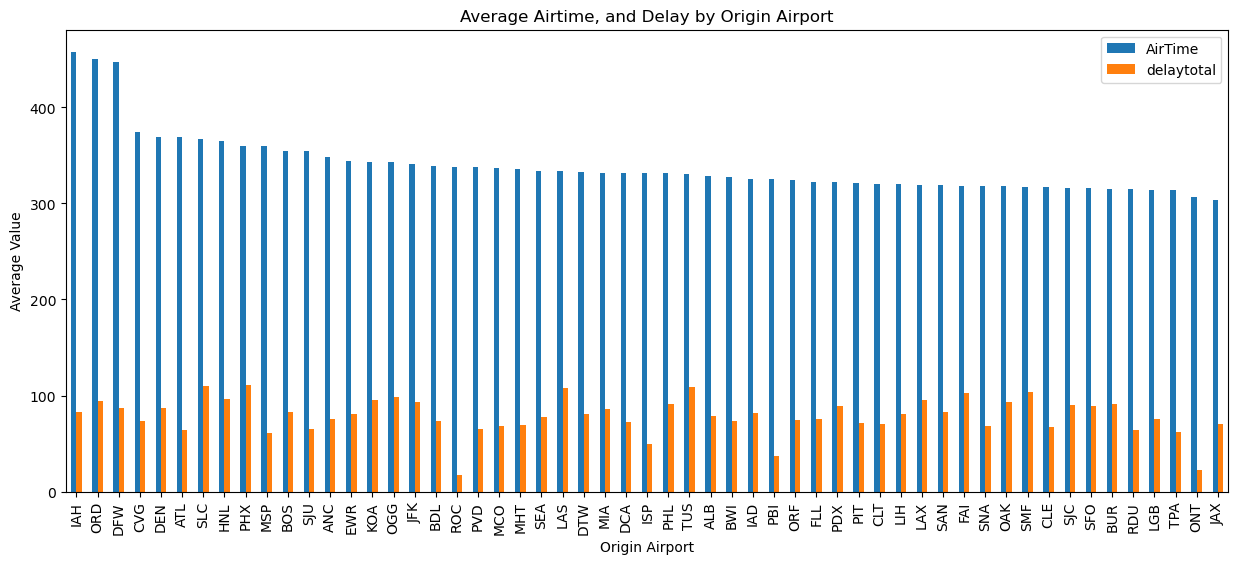

In [94]:
# Assuming delay is your pandas DataFrame containing the data
grouped_data = delay.groupby(["Origin"]).agg({"AirTime":"mean","delaytotal":"mean"})

grouped_data = grouped_data.sort_values(by="AirTime", ascending=False)
# Create bar plot
fig, ax = plt.subplots(figsize=(15,6))
grouped_data.plot(kind="bar", ax=ax)

# Set plot title and labels
ax.set_title("Average Airtime, and Delay by Origin Airport")
ax.set_xlabel("Origin Airport")
ax.set_ylabel("Average Value")

# Show plot
plt.show()